In [3]:
from FlagComplex import FlagComplex
from Examples import construct_from_ratio
from ProjGeometryUtility import connecting_line
import numpy as np
import drawSvg as draw
from DrawingUtility import drawcirc

# 4-tuple of flags

In [4]:
fcomplex = FlagComplex()

"""
Trying out different values
p0 = np.array([1, 0.3, 1])
q0 = np.array([1.3, 1.1, 1])

p1 = np.array([0.1, 1, 1])
q1 = np.array([-1.2, 1.3, 1])

p2 = np.array([-1.2, 0.2, 1])
q2 = np.array([-1, -1.3, 1])

p3 = np.array([-0.1, -1, 1])
q3 = np.array([-1.2, -1.1, 1])
"""
"""
p0 = np.array([-0.5, -np.sqrt(0.75), 1])
q0 = np.array([0.5, -np.sqrt(0.75), 1])

p1 = np.array([1, 0, 1])
q1 = np.array([1, 1, 1])

p2 = np.array([-0.5, np.sqrt(0.75), 1])
q2 = np.array([0.5, np.sqrt(0.75), 1])

p3 = np.array([-2, 0, 1])
q3 = np.array([-2, 1, 1])
"""

p0 = np.array([-0.5, -np.sqrt(0.75), 1])
q0 = np.array([0.5, -np.sqrt(0.75)+0.4, 1])

p1 = np.array([1, 0.1, 1])
q1 = np.array([1, -0.5, 1])

p2 = np.array([-0.5, np.sqrt(0.75), 1])
q2 = np.array([0.5, np.sqrt(0.75)-0.4, 1])

p3 = np.array([-2, -0.1, 1])
q3 = np.array([-2, 0.5, 1])




fcomplex.add_flag(p0,q0)
fcomplex.add_flag(p1,q1)
fcomplex.add_flag(p2,q2)
fcomplex.add_flag(p3,q3)

fcomplex.set_projection_plane(np.array([0,0,1]))

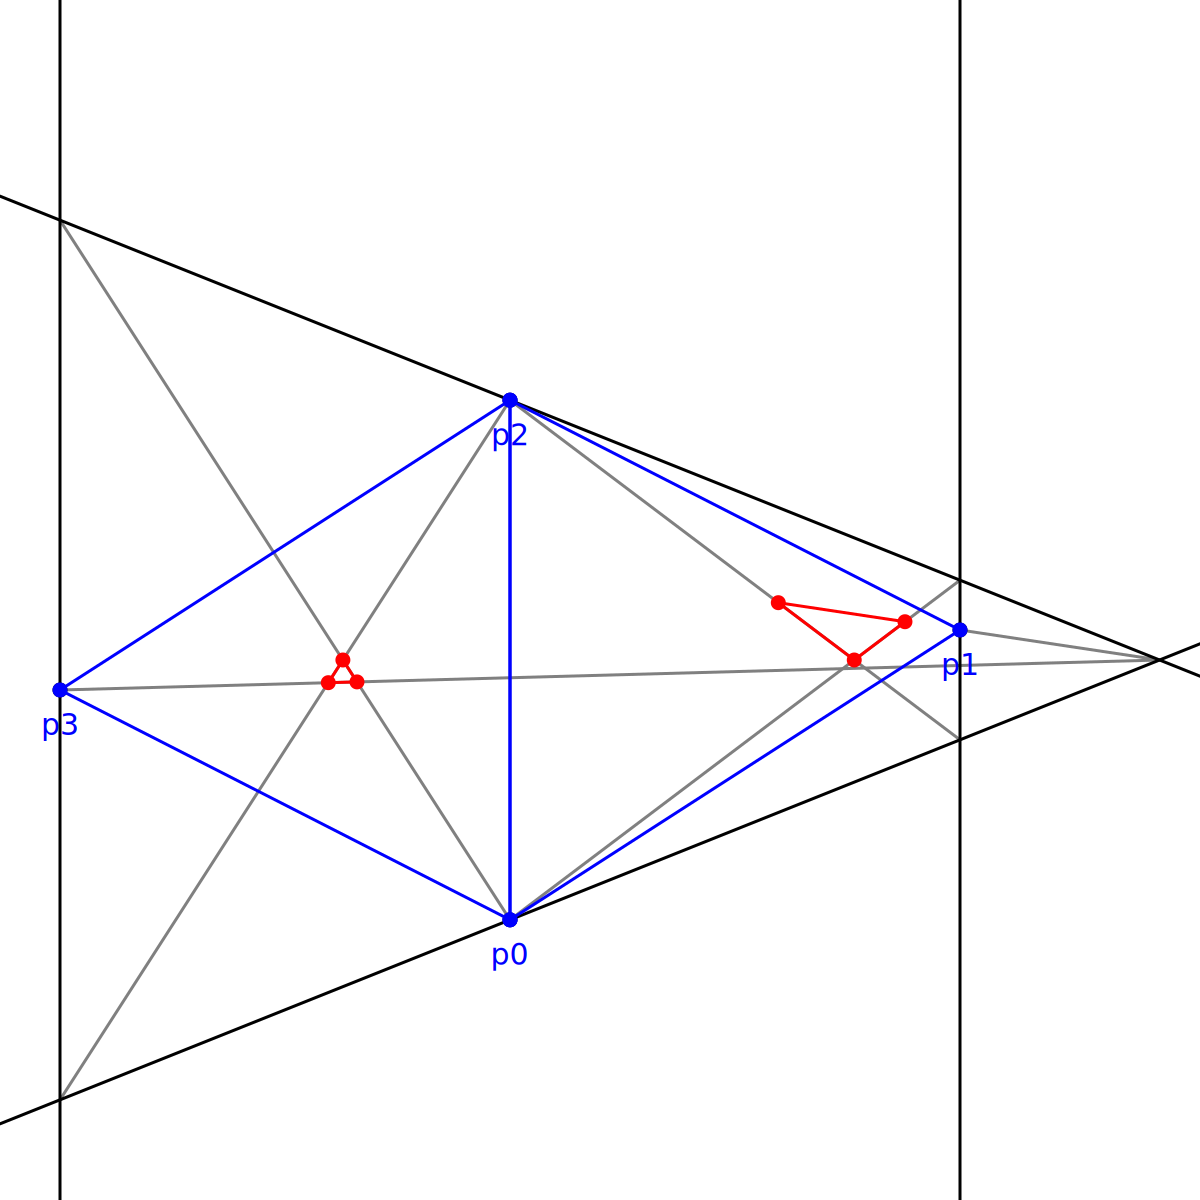

In [5]:
import copy

d = draw.Drawing(400, 400,origin=(-220,-180))
# White background for the pictures
drawcirc(d,[0,0],4)
# Render size for the pictures (resolution in terms of image width)
d.setRenderSize(w=1200)

fcomplex.create_triangulation()
fcomplex.draw_complex()


d1 = copy.deepcopy(d)
fcomplex.visualize(d1,with_helper_lines=True, with_inner_triangles = True, with_label= True)
d1.savePng("ef_4.png")
d1

In [6]:
import copy

steps=200

triangle0 = [0, 1, 2]
triangle1 = [0, 2, 3]

style = "Q"

fcomplex.erupt_triangle(t=-0.08, triangle=triangle0, transformation_style=style)
fcomplex.erupt_triangle(t=0.08, triangle=triangle1, transformation_style=style)

for r in range(1, steps):
    fcomplex.erupt_triangle(t=0.08, triangle=triangle0, transformation_style=style)
    fcomplex.erupt_triangle(t=-0.08, triangle=triangle1, transformation_style=style)

    
    d1 = copy.deepcopy(d)

    fcomplex.visualize(d1,with_helper_lines=True, with_inner_triangles = True, with_label=True)

    d1.savePng("./temp/ef4_" + str(r) + ".png")

In [7]:
import numpy as np
from moviepy.editor import ImageSequenceClip

images_list = ["temp/ef4_"+str(r)+".png" for r in range(1,steps)]
animation = ImageSequenceClip(images_list, fps=25)
#animation.write_videofile("eruption_flow_movie.avi", codec="png")
#animation.write_gif("eruption_flow_style_p.gif")
animation.ipython_display(fps=25, loop=True, autoplay=True)

100%|██████████| 200/200 [00:05<00:00, 38.69it/s]
